In [1]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import gensim
import matplotlib.pyplot as pyplot
from sklearn.manifold import TSNE
from keras import metrics
from sklearn import metrics

c:\users\himani soni\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\himani soni\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import numpy as np
import pandas as pd
import os
import pickle
import itertools
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, Flatten, Dense, Dropout
from keras.layers import ThresholdedReLU, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.layers import Input
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras.models import Model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.layers.merge import Concatenate
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM

In [3]:
train = pd.read_csv('en_training_csv.csv',engine='python')
X = train["text"]
y = train["HS"]
print(X.str.len().max())

360


In [4]:
import string
def cleanup_str(st, numbers=False):
    if type(st) == bytes:
        try:
            st = st.decode('utf-8').strip().lower()
        except:
            print('unicode error: {}'.format(st))

    if numbers == True:
        keep = set(string.ascii_lowercase + string.digits + string.punctuation + ' ')
    else:
        keep = set(string.ascii_lowercase + string.punctuation + ' ')

    # clean string
    st = ''.join(x if x in keep else ' ' for x in st)
    # rem multiple spaces
    st = re.sub(' +', ' ', st)

    return st

def cleanup_col(col, numbers=False):
    col = map(lambda x: cleanup_str(x, numbers=numbers), col)
    return list(col)

def binarize_tokenized(X, vocab_len):
    binarizer = LabelBinarizer()
    binarizer.fit(range(vocab_len))
    X = np.array([binarizer.transform(x) for x in X])

    return X

def char_preproc(X, Y, vocab_len, binarize=False):
    # -----------------------------
    # preproc X's------------------
 
    # cleanup
    X = cleanup_col(X, numbers=True)
    # split in arrays of characters
    char_arrs = [[x for x in y] for y in X]
 
    # tokenize
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(char_arrs)
 
    # token sequences
    seq = tokenizer.texts_to_sequences(X)
 
    # pad to same length
    seq = pad_sequences(seq, maxlen=360, padding='post', truncating='post', value=0)
 
    # make to on-hot
    if binarize:
        X = binarize_tokenized(seq, vocab_len)
    else:
        X = seq
 
    return X,y

In [5]:
train = pd.read_csv('en_training_csv.csv',engine='python')
X = train["text"]
y = train["HS"]
X,y = char_preproc(X, y, 70, False)


In [12]:
main_input = Input(shape=(360, ), dtype='int32', name='main_input')
embedding = Embedding(128, 128, input_length=360)(main_input)
bi_lstm = Bidirectional(layer=LSTM(100, return_sequences=False,  dropout=0.5, recurrent_dropout=0.5), merge_mode='concat')(embedding)
x = Dropout(0.5)(bi_lstm)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=main_input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 360)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 360, 128)          16384     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               183200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 199,785
Trainable params: 199,785
Non-trainable params: 0
_________________________________________________________________
None


Train on 7200 samples, validate on 1800 samples
Epoch 1/20
 - 307s - loss: 0.6458 - acc: 0.6314 - val_loss: 0.6142 - val_acc: 0.6817
Epoch 2/20
 - 292s - loss: 0.6459 - acc: 0.6299 - val_loss: 0.6152 - val_acc: 0.6639
Epoch 3/20
 - 286s - loss: 0.6460 - acc: 0.6318 - val_loss: 0.6136 - val_acc: 0.6789
Epoch 4/20
 - 286s - loss: 0.6356 - acc: 0.6385 - val_loss: 0.6209 - val_acc: 0.6539
Epoch 5/20
 - 293s - loss: 0.6344 - acc: 0.6422 - val_loss: 0.6148 - val_acc: 0.6767
Epoch 6/20
 - 298s - loss: 0.6386 - acc: 0.6399 - val_loss: 0.6275 - val_acc: 0.6622
Epoch 7/20
 - 289s - loss: 0.6329 - acc: 0.6479 - val_loss: 0.6128 - val_acc: 0.6678
Epoch 8/20
 - 286s - loss: 0.6359 - acc: 0.6312 - val_loss: 0.6232 - val_acc: 0.6650
Epoch 9/20
 - 286s - loss: 0.6359 - acc: 0.6303 - val_loss: 0.6234 - val_acc: 0.6667
Epoch 10/20
 - 287s - loss: 0.6408 - acc: 0.6206 - val_loss: 0.6202 - val_acc: 0.6550
Epoch 11/20
 - 289s - loss: 0.6316 - acc: 0.6419 - val_loss: 0.6130 - val_acc: 0.6650
Epoch 12/20
 - 

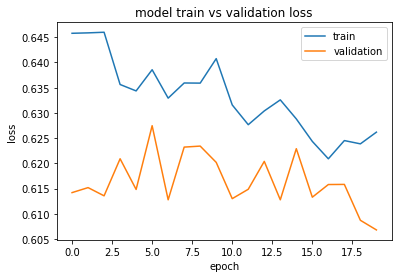

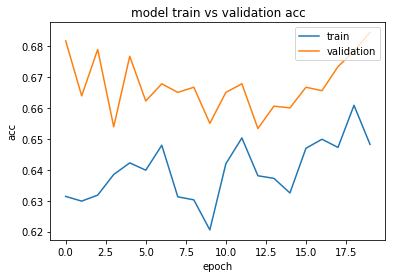

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size=64,epochs=50,verbose=2)

print("Test-acc:", np.mean(history.history["val_acc"]))

# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model train vs validation acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [6]:
main_input = Input(shape=(360, ), dtype='int32', name='main_input')
embedding = Embedding(256, 256, input_length=360)(main_input)
bi_lstm = Bidirectional(layer=LSTM(100, return_sequences=False,  dropout=0.5, recurrent_dropout=0.5), merge_mode='concat')(embedding)
x = Dropout(0.5)(bi_lstm)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=main_input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 360)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 360, 256)          65536     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               285600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 351,337
Trainable params: 351,337
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size=64,epochs=20,verbose=2)

print("Test-acc:", np.mean(history.history["val_acc"]))

# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model train vs validation acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


Train on 7200 samples, validate on 1800 samples
Epoch 1/20


KeyboardInterrupt: 

In [8]:
main_input = Input(shape=(360, ), dtype='int32', name='main_input')
embedding = Embedding(128, 128, input_length=360)(main_input)
bi_lstm = Bidirectional(layer=LSTM(150, return_sequences=False,  dropout=0.5, recurrent_dropout=0.5), merge_mode='concat')(embedding)
x = Dropout(0.5)(bi_lstm)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=main_input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 360)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 360, 128)          16384     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300)               334800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
Total params: 351,485
Trainable params: 351,485
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size=64,epochs=20,verbose=2)

print("Test-acc:", np.mean(history.history["val_acc"]))

# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model train vs validation acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


Train on 7200 samples, validate on 1800 samples
Epoch 1/20
 - 256s - loss: 0.6754 - acc: 0.5821 - val_loss: 0.6683 - val_acc: 0.6022
Epoch 2/20
 - 299s - loss: 0.6665 - acc: 0.5986 - val_loss: 0.6592 - val_acc: 0.6011
Epoch 3/20
 - 474s - loss: 0.6587 - acc: 0.6118 - val_loss: 0.6603 - val_acc: 0.6028
Epoch 4/20
 - 455s - loss: 0.6491 - acc: 0.6194 - val_loss: 0.6290 - val_acc: 0.6400
Epoch 5/20
 - 454s - loss: 0.6446 - acc: 0.6221 - val_loss: 0.6337 - val_acc: 0.6211
Epoch 6/20
 - 458s - loss: 0.6495 - acc: 0.6169 - val_loss: 0.6280 - val_acc: 0.6328
Epoch 7/20
 - 492s - loss: 0.6521 - acc: 0.6176 - val_loss: 0.6257 - val_acc: 0.6206
Epoch 8/20
 - 638s - loss: 0.6366 - acc: 0.6311 - val_loss: 0.6298 - val_acc: 0.6506
Epoch 9/20
 - 526s - loss: 0.6376 - acc: 0.6337 - val_loss: 0.6286 - val_acc: 0.6267
Epoch 10/20
 - 502s - loss: 0.6352 - acc: 0.6362 - val_loss: 0.6261 - val_acc: 0.6528
Epoch 11/20
 - 570s - loss: 0.6284 - acc: 0.6436 - val_loss: 0.6282 - val_acc: 0.6478
Epoch 12/20
 - 